<a href="https://colab.research.google.com/github/paradkarpravin15/Cafe_Sales_Analysis/blob/main/Cafe_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cafe Sales Analysis

### 🧾 **Problem Statement**

**To clean, analyze, and extract actionable insights from a synthetic, intentionally messy sales dataset from a cafe. The goal is to handle missing and inconsistent data, perform exploratory data analysis (EDA), and generate meaningful business insights that can support decision-making.**

---

### ✅ **Objectives**

1. **Data Cleaning:**

   * Identify and handle missing values, invalid entries, and inconsistent data formats.
   * Ensure numerical consistency (e.g., correct `Total Spent` based on `Quantity` × `Price Per Unit`).
   * Standardize date and categorical formats.

2. **Exploratory Data Analysis (EDA):**

   * Uncover trends in sales over time, by location, and by item.
   * Identify top-selling products and peak sales periods.
   * Visualize payment methods, item popularity, and customer behavior.

3. **Feature Engineering:**

   * Extract additional time-based features (e.g., day of week, month).
   * Create derived metrics (e.g., average spend per transaction, item category if applicable).

4. **Business Insight Generation:**

   * Recommend improvements in product offerings or pricing based on sales patterns.
   * Highlight anomalies or trends worth investigating (e.g., frequent use of "UNKNOWN").
   * Suggest operational improvements (e.g., preferred payment method insights, popular hours).

---

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# upload file here
from google.colab import files
upload = files.upload()

Saving dirty_cafe_sales.csv to dirty_cafe_sales.csv


In [3]:
# Load the dataset
df = pd.read_csv("dirty_cafe_sales.csv")

# 1. Data Understanding

# Issues with dataset

*   Item column have missing values.
*   Item column also have invalid entries like ERROR & UNKNOWN.
*   Quantity column have missing values.
*   Quantity column also have invalid entries ERROR & UNKOWN.
*   Total spent column have missing values.
*   Total spent also have invalid entries ERROR & UNKOWN.
*   Payment method column have missing values.
*   Payment method column also have invalid entries ERROR & UNKOWN.
*   Location column have missing values.
*   Location column also have invalid entries ERROR & UNKOWN.
*   Transaction date column have missing values.
*   Transaction column also have invalid entries ERROR & UNKOWN.


In [4]:
# Display first 5 rows
print(df.head())

  Transaction ID    Item Quantity Price Per Unit Total Spent  Payment Method  \
0    TXN_1961373  Coffee        2            2.0         4.0     Credit Card   
1    TXN_4977031    Cake        4            3.0        12.0            Cash   
2    TXN_4271903  Cookie        4            1.0       ERROR     Credit Card   
3    TXN_7034554   Salad        2            5.0        10.0         UNKNOWN   
4    TXN_3160411  Coffee        2            2.0         4.0  Digital Wallet   

   Location Transaction Date  
0  Takeaway       2023-09-08  
1  In-store       2023-05-16  
2  In-store       2023-07-19  
3   UNKNOWN       2023-04-27  
4  In-store       2023-06-11  


In [5]:
# Display first 5 rows
print(df.tail())

     Transaction ID      Item Quantity Price Per Unit Total Spent  \
9995    TXN_7672686    Coffee        2            2.0         4.0   
9996    TXN_9659401       NaN        3            NaN         3.0   
9997    TXN_5255387    Coffee        4            2.0         8.0   
9998    TXN_7695629    Cookie        3            NaN         3.0   
9999    TXN_6170729  Sandwich        3            4.0        12.0   

      Payment Method  Location Transaction Date  
9995             NaN   UNKNOWN       2023-08-30  
9996  Digital Wallet       NaN       2023-06-02  
9997  Digital Wallet       NaN       2023-03-02  
9998  Digital Wallet       NaN       2023-12-02  
9999            Cash  In-store       2023-11-07  


In [6]:
# Size of the Dataset
print(df.shape)

(10000, 8)


In [7]:
# Check data types and memory usage
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB
None


In [8]:
# Check for missing values
print(df.isnull().sum())

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64


In [9]:
# Check for duplicate rows
print("Number of duplicate rows:")
print(df.duplicated().sum())

Number of duplicate rows:
0


In [10]:
# convert catgorical column to numerical
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')

In [11]:
# Summary statistics for numerical columns
print(df.describe())

          Quantity  Price Per Unit  Total Spent
count  9521.000000     9467.000000  9498.000000
mean      3.028463        2.949984     8.924352
std       1.419007        1.278450     6.009919
min       1.000000        1.000000     1.000000
25%       2.000000        2.000000     4.000000
50%       3.000000        3.000000     8.000000
75%       4.000000        4.000000    12.000000
max       5.000000        5.000000    25.000000


In [12]:
# Summary statistics for categorical columns
print(df.describe(include=['object']))

       Transaction ID   Item  Payment Method  Location Transaction Date
count           10000   9667            7421      6735             9841
unique          10000     10               5         4              367
top       TXN_9226047  Juice  Digital Wallet  Takeaway          UNKNOWN
freq                1   1171            2291      3022              159


In [13]:
# Checking for duplicate rows in Transaction ID
df[df.duplicated(subset='Transaction ID')]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date


# 2. Data Cleaning

Creating copy of dataset to perform data cleaning

In [14]:
# created a copy of dataset
cafe = df.copy()

In [15]:
print(cafe.columns)

Index(['Transaction ID', 'Item', 'Quantity', 'Price Per Unit', 'Total Spent',
       'Payment Method', 'Location', 'Transaction Date'],
      dtype='object')


In [16]:
cafe['Quantity'] = pd.to_numeric(cafe['Quantity'], errors='coerce')
cafe['Price Per Unit'] = pd.to_numeric(cafe['Price Per Unit'], errors='coerce')
cafe['Total Spent'] = pd.to_numeric(cafe['Total Spent'], errors='coerce')

In [17]:
print(cafe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    10000 non-null  object 
 1   Item              9667 non-null   object 
 2   Quantity          9521 non-null   float64
 3   Price Per Unit    9467 non-null   float64
 4   Total Spent       9498 non-null   float64
 5   Payment Method    7421 non-null   object 
 6   Location          6735 non-null   object 
 7   Transaction Date  9841 non-null   object 
dtypes: float64(3), object(5)
memory usage: 625.1+ KB
None


In [18]:
# Checking for null values
print(cafe[cafe['Price Per Unit'].isna()])

     Transaction ID      Item  Quantity  Price Per Unit  Total Spent  \
56      TXN_3578141      Cake       5.0             NaN         15.0   
65      TXN_4987129  Sandwich       3.0             NaN          NaN   
68      TXN_8427104     Salad       2.0             NaN         10.0   
85      TXN_8035512       Tea       3.0             NaN          4.5   
104     TXN_7447872     Juice       2.0             NaN          6.0   
...             ...       ...       ...             ...          ...   
9924    TXN_5981429     Juice       2.0             NaN          6.0   
9926    TXN_2464706      Cake       4.0             NaN         12.0   
9961    TXN_2153100       Tea       2.0             NaN          3.0   
9996    TXN_9659401       NaN       3.0             NaN          3.0   
9998    TXN_7695629    Cookie       3.0             NaN          3.0   

      Payment Method  Location Transaction Date  
56               NaN  Takeaway       2023-06-27  
65               NaN  In-store     

In [19]:
# Divide total spent with quantity to find Price Per Unit
cafe['Price Per Unit'].fillna(cafe['Total Spent']/cafe['Quantity'], inplace=True)

In [20]:
# Checking null values in total spent
print(cafe[cafe['Total Spent'].isna()])

     Transaction ID      Item  Quantity  Price Per Unit  Total Spent  \
2       TXN_4271903    Cookie       4.0             1.0          NaN   
25      TXN_7958992  Smoothie       3.0             4.0          NaN   
31      TXN_8927252   UNKNOWN       2.0             1.0          NaN   
42      TXN_6650263       Tea       2.0             1.5          NaN   
65      TXN_4987129  Sandwich       3.0             NaN          NaN   
...             ...       ...       ...             ...          ...   
9893    TXN_3809533     Juice       2.0             NaN          NaN   
9954    TXN_1191659    Coffee       4.0             2.0          NaN   
9977    TXN_5548914     Juice       2.0             3.0          NaN   
9988    TXN_9594133      Cake       5.0             3.0          NaN   
9993    TXN_4766549  Smoothie       2.0             4.0          NaN   

      Payment Method  Location Transaction Date  
2        Credit Card  In-store       2023-07-19  
25           UNKNOWN   UNKNOWN     

In [21]:
# Calculate total spent using Quantity * Price Per Unit
cafe['Total Spent'].fillna(cafe['Quantity'] * cafe['Price Per Unit'], inplace=True)

In [22]:
# Calculate Quantity using Total Spent divide by Price Per Unit
cafe['Quantity'].fillna(cafe['Total Spent']/ cafe['Price Per Unit'], inplace=True)

In [23]:
# Checking null values in Item columns
print(cafe[cafe['Item'].isna()])

     Transaction ID Item  Quantity  Price Per Unit  Total Spent  \
8       TXN_4717867  NaN       5.0             3.0         15.0   
30      TXN_1736287  NaN       5.0             2.0         10.0   
61      TXN_8051289  NaN       1.0             3.0          3.0   
72      TXN_6044979  NaN       1.0             1.0          1.0   
89      TXN_4132730  NaN       5.0             1.0          5.0   
...             ...  ...       ...             ...          ...   
9820    TXN_8751702  NaN       5.0             3.0         15.0   
9855    TXN_3740505  NaN       2.0             1.5          3.0   
9876    TXN_3105633  NaN       1.0             2.0          2.0   
9885    TXN_4659954  NaN       3.0             4.0         12.0   
9996    TXN_9659401  NaN       3.0             1.0          3.0   

      Payment Method  Location Transaction Date  
8                NaN  Takeaway       2023-07-28  
30    Digital Wallet       NaN       2023-06-02  
61               NaN  In-store       2023-10-

In [24]:
# Function to assign missing item names based on their 'Price Per Unit' values
def guess_item_acc_to_price(df):
  if 'Price Per Unit' in df.columns and 'Item' in df.columns:
    df.loc[(df['Price Per Unit'] == 2.0) & (df['Item'].isna()), 'Item'] = 'Coffee'
    df.loc[(df['Price Per Unit'] == 1.5) & (df['Item'].isna()), 'Item'] = 'Tea'
    df.loc[(df['Price Per Unit'] == 4.0) & (df['Item'].isna()), 'Item'] = 'Sandwich'
    df.loc[(df['Price Per Unit'] == 5.0) & (df['Item'].isna()), 'Item'] = 'Salad'
    df.loc[(df['Price Per Unit'] == 3.0) & (df['Item'].isna()), 'Item'] = 'Cake'
    df.loc[(df['Price Per Unit'] == 1.0) & (df['Item'].isna()), 'Item'] = 'Cookie'
  else:
    print("Missing expected columns in DataFrame.")
  return df

In [25]:
# Fill missing item names in the 'cafe' DataFrame based on 'Price Per Unit'
cafe = guess_item_acc_to_price(cafe)

In [26]:
cafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    10000 non-null  object 
 1   Item              9998 non-null   object 
 2   Quantity          9962 non-null   float64
 3   Price Per Unit    9962 non-null   float64
 4   Total Spent       9960 non-null   float64
 5   Payment Method    7421 non-null   object 
 6   Location          6735 non-null   object 
 7   Transaction Date  9841 non-null   object 
dtypes: float64(3), object(5)
memory usage: 625.1+ KB


In [27]:
# View rows where the 'Item' column is still missing (NaN)
cafe[cafe['Item'].isna()]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
1761,TXN_3611851,NaN,4.0,NaN,NaN,Credit Card,NaN,2023-02-09
9819,TXN_1208561,NaN,NaN,NaN,20.0,Credit Card,NaN,2023-08-19


In [28]:
# View rows where the 'Price Per Unit' column is still missing (NaN)
cafe[cafe['Price Per Unit'].isna()]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
65,TXN_4987129,Sandwich,3.0,NaN,NaN,NaN,In-store,2023-10-20
629,TXN_9289174,Cake,NaN,NaN,12.0,Digital Wallet,In-store,2023-12-30
912,TXN_1575608,Sandwich,NaN,NaN,20.0,ERROR,Takeaway,2023-01-05
1008,TXN_7225428,Tea,NaN,NaN,3.0,Credit Card,Takeaway,2023-03-07
1436,TXN_7590801,Tea,NaN,NaN,6.0,Cash,Takeaway,ERROR
1482,TXN_3593060,Smoothie,NaN,NaN,16.0,Cash,NaN,2023-03-05
1674,TXN_9367492,Tea,2.0,NaN,NaN,Cash,In-store,2023-06-19
1761,TXN_3611851,NaN,4.0,NaN,NaN,Credit Card,NaN,2023-02-09
2229,TXN_8498613,Sandwich,2.0,NaN,NaN,NaN,NaN,2023-11-08
2289,TXN_7524977,UNKNOWN,4.0,NaN,NaN,ERROR,NaN,2023-12-09


In [29]:
# Function to fill missing 'Price Per Unit' values based on known 'Item' names
def price_per_unit_acc_to_item(df):
    if 'Item' in df.columns and 'Price Per Unit' in df.columns:
        df.loc[(df['Item'] == 'Coffee') & (df['Price Per Unit'].isna()), 'Price Per Unit'] = 2
        df.loc[(df['Item'] == 'Tea') & (df['Price Per Unit'].isna()), 'Price Per Unit'] = 1.5
        df.loc[(df['Item'] == 'Sandwich') & (df['Price Per Unit'].isna()), 'Price Per Unit'] = 4
        df.loc[(df['Item'] == 'Salad') & (df['Price Per Unit'].isna()), 'Price Per Unit'] = 4
        df.loc[(df['Item'] == 'Cake') & (df['Price Per Unit'].isna()), 'Price Per Unit'] = 3
        df.loc[(df['Item'] == 'Cookie') & (df['Price Per Unit'].isna()), 'Price Per Unit'] = 1
        df.loc[(df['Item'] == 'Smoothie') & (df['Price Per Unit'].isna()), 'Price Per Unit'] = 4
        df.loc[(df['Item'] == 'Juice') & (df['Price Per Unit'].isna()), 'Price Per Unit'] = 3
    else:
        print("Missing expected columns in DataFrame.")
    return df

In [30]:
# Fill missing 'Price Per Unit' in the 'cafe' DataFrame using corresponding 'Item' names
cafe = price_per_unit_acc_to_item(cafe)

In [31]:
cafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    10000 non-null  object 
 1   Item              9998 non-null   object 
 2   Quantity          9962 non-null   float64
 3   Price Per Unit    9994 non-null   float64
 4   Total Spent       9960 non-null   float64
 5   Payment Method    7421 non-null   object 
 6   Location          6735 non-null   object 
 7   Transaction Date  9841 non-null   object 
dtypes: float64(3), object(5)
memory usage: 625.1+ KB


In [32]:
# View rows where the 'Total Spent' column is still missing (NaN)
cafe[cafe['Total Spent'].isna()]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
65,TXN_4987129,Sandwich,3.0,4.0,NaN,NaN,In-store,2023-10-20
236,TXN_8562645,Salad,NaN,5.0,NaN,NaN,In-store,2023-05-18
278,TXN_3229409,Juice,NaN,3.0,NaN,Cash,Takeaway,2023-04-15
641,TXN_2962976,Juice,NaN,3.0,NaN,NaN,NaN,2023-03-17
738,TXN_8696094,Sandwich,NaN,4.0,NaN,NaN,Takeaway,2023-05-14
1674,TXN_9367492,Tea,2.0,1.5,NaN,Cash,In-store,2023-06-19
1761,TXN_3611851,NaN,4.0,NaN,NaN,Credit Card,NaN,2023-02-09
2229,TXN_8498613,Sandwich,2.0,4.0,NaN,NaN,NaN,2023-11-08
2289,TXN_7524977,UNKNOWN,4.0,NaN,NaN,ERROR,NaN,2023-12-09
2585,TXN_1259340,Tea,3.0,1.5,NaN,Digital Wallet,NaN,2023-02-24


In [33]:
# Fill missing 'Total Spent' values using 'Price Per Unit' multiplied by 'Quantity'
cafe['Total Spent'].fillna(cafe['Price Per Unit'] * cafe['Quantity'], inplace=True)

In [34]:
# View rows where the 'Quantity' column is still missing (NaN)
cafe[cafe['Quantity'].isna()]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
236,TXN_8562645,Salad,NaN,5.0,NaN,NaN,In-store,2023-05-18
278,TXN_3229409,Juice,NaN,3.0,NaN,Cash,Takeaway,2023-04-15
629,TXN_9289174,Cake,NaN,3.0,12.0,Digital Wallet,In-store,2023-12-30
641,TXN_2962976,Juice,NaN,3.0,NaN,NaN,NaN,2023-03-17
738,TXN_8696094,Sandwich,NaN,4.0,NaN,NaN,Takeaway,2023-05-14
912,TXN_1575608,Sandwich,NaN,4.0,20.0,ERROR,Takeaway,2023-01-05
1008,TXN_7225428,Tea,NaN,1.5,3.0,Credit Card,Takeaway,2023-03-07
1436,TXN_7590801,Tea,NaN,1.5,6.0,Cash,Takeaway,ERROR
1482,TXN_3593060,Smoothie,NaN,4.0,16.0,Cash,NaN,2023-03-05
2330,TXN_3849488,Salad,NaN,4.0,5.0,NaN,In-store,2023-03-01


In [35]:
# Fill missing 'Quantity' values using 'Total Spent' divide by 'Price Per Unit'
cafe['Quantity'].fillna(cafe['Total Spent'] / cafe['Price Per Unit'], inplace=True)

In [36]:
# Function to correct 'Item' values labeled as 'ERROR' or 'UNKNOWN' using 'Price Per Unit'
def guess_item(df):
  if 'Item' in df.columns and 'Price Per Unit' in df.columns:
    df.loc[(df['Item'] == 'ERROR') & (df['Price Per Unit'] == 2), 'Item'] = 'Coffee'
    df.loc[(df['Item'] == 'ERROR') & (df['Price Per Unit'] == 1.5), 'Item'] = 'Tea'
    df.loc[(df['Item'] == 'ERROR') & (df['Price Per Unit'] == 4), 'Item'] = 'Sandwich'
    df.loc[(df['Item'] == 'ERROR') & (df['Price Per Unit'] == 5), 'Item'] = 'Salad'
    df.loc[(df['Item'] == 'ERROR') & (df['Price Per Unit'] == 3), 'Item'] = 'Cake'
    df.loc[(df['Item'] == 'ERROR') & (df['Price Per Unit'] == 1), 'Item'] = 'Cookie'
    df.loc[(df['Item'] == 'ERROR') & (df['Price Per Unit'] == 4), 'Item'] = 'Smoothie'
    df.loc[(df['Item'] == 'ERROR') & (df['Price Per Unit'] == 3), 'Item'] = 'Juice'
    df.loc[(df['Item'] == 'UNKNOWN') & (df['Price Per Unit'] == 2), 'Item'] = 'Coffee'
    df.loc[(df['Item'] == 'UNKNOWN') & (df['Price Per Unit'] == 1.5), 'Item'] = 'Tea'
    df.loc[(df['Item'] == 'UNKNOWN') & (df['Price Per Unit'] == 4), 'Item'] = 'Sandwich'
    df.loc[(df['Item'] == 'UNKNOWN') & (df['Price Per Unit'] == 5), 'Item'] = 'Salad'
    df.loc[(df['Item'] == 'UNKNOWN') & (df['Price Per Unit'] == 3), 'Item'] = 'Cake'
    df.loc[(df['Item'] == 'UNKNOWN') & (df['Price Per Unit'] == 1), 'Item'] = 'Cookie'
    df.loc[(df['Item'] == 'UNKNOWN') & (df['Price Per Unit'] == 4), 'Item'] = 'Smoothie'
    df.loc[(df['Item'] == 'UNKNOWN') & (df['Price Per Unit'] == 3), 'Item'] = 'Juice'
  else:
    print("Missing expected columns in DataFrame.")
  return df

In [37]:
# Replace 'ERROR' or 'UNKNOWN' entries in 'Item' column using 'Price Per Unit'
cafe = guess_item(cafe)

In [38]:
# Display ERROR rows in item column
cafe[cafe['Item'] == 'ERROR']

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
4152,TXN_9646000,ERROR,2.0,NaN,NaN,NaN,In-store,2023-12-14
7597,TXN_1082717,ERROR,NaN,NaN,9.0,Digital Wallet,In-store,2023-12-13


In [39]:
cafe['Price Per Unit'].isna().sum()

np.int64(6)

In [40]:
cafe['Price Per Unit'].fillna(cafe['Price Per Unit'].mode()[0], inplace=True)

In [41]:
cafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    10000 non-null  object 
 1   Item              9998 non-null   object 
 2   Quantity          9977 non-null   float64
 3   Price Per Unit    10000 non-null  float64
 4   Total Spent       9977 non-null   float64
 5   Payment Method    7421 non-null   object 
 6   Location          6735 non-null   object 
 7   Transaction Date  9841 non-null   object 
dtypes: float64(3), object(5)
memory usage: 625.1+ KB


In [42]:
cafe['Quantity'].median()

3.0

In [43]:
cafe['Quantity'].fillna(cafe['Quantity'].median(), inplace=True)

In [44]:
cafe['Total Spent'] = cafe['Quantity'] * cafe['Price Per Unit']

In [45]:
cafe[cafe['Item'].isna()]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
1761,TXN_3611851,NaN,4.0,3.0,12.0,Credit Card,NaN,2023-02-09
9819,TXN_1208561,NaN,3.0,3.0,9.0,Credit Card,NaN,2023-08-19


In [46]:
cafe['Item'].fillna('Juice', inplace=True)

In [47]:
cafe['Item'] = cafe['Item'].astype('category')

In [48]:
cafe['Item'].cat.categories

Index(['Cake', 'Coffee', 'Cookie', 'ERROR', 'Juice', 'Salad', 'Sandwich',
       'Smoothie', 'Tea', 'UNKNOWN'],
      dtype='object')

In [49]:
cafe[cafe['Item'] == 'ERROR']

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
4152,TXN_9646000,ERROR,2.0,3.0,6.0,NaN,In-store,2023-12-14
7597,TXN_1082717,ERROR,3.0,3.0,9.0,Digital Wallet,In-store,2023-12-13


In [50]:
cafe['Item'] = cafe['Item'].replace('ERROR', 'Juice')

In [51]:
cafe[cafe['Item'] == 'ERROR']

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date


In [52]:
cafe[cafe['Item'] == 'UNKNOWN']

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
2289,TXN_7524977,UNKNOWN,4.0,3.0,12.0,ERROR,NaN,2023-12-09
3779,TXN_7376255,UNKNOWN,3.0,3.0,9.0,NaN,In-store,2023-05-27


In [53]:
cafe['Item'] = cafe['Item'].replace('UNKNOWN', 'Juice')

In [54]:
cafe['Item'].cat.categories

Index(['Cake', 'Coffee', 'Cookie', 'Juice', 'Salad', 'Sandwich', 'Smoothie',
       'Tea'],
      dtype='object')

In [55]:
cafe[cafe['Payment Method'].isna()]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
8,TXN_4717867,Cake,5.0,3.0,15.0,NaN,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5.0,4.0,20.0,NaN,In-store,2023-12-31
13,TXN_9437049,Cookie,5.0,1.0,5.0,NaN,Takeaway,2023-06-01
14,TXN_8915701,Tea,2.0,1.5,3.0,NaN,In-store,2023-03-21
16,TXN_3765707,Sandwich,1.0,4.0,4.0,NaN,NaN,2023-06-10
...,...,...,...,...,...,...,...,...
9978,TXN_4302199,Tea,3.0,1.5,4.5,NaN,NaN,2023-02-16
9982,TXN_8567525,Cookie,2.0,1.0,2.0,NaN,Takeaway,2023-12-30
9985,TXN_3297457,Cake,2.0,3.0,6.0,NaN,UNKNOWN,2023-01-03
9994,TXN_7851634,Sandwich,4.0,4.0,16.0,NaN,NaN,2023-01-08


In [56]:
cafe[cafe['Payment Method'] == 'ERROR']

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
6,TXN_4433211,Cake,3.0,3.0,9.0,ERROR,Takeaway,2023-10-06
39,TXN_6688524,Coffee,4.0,2.0,8.0,ERROR,NaN,2023-06-29
51,TXN_6342161,Salad,5.0,5.0,25.0,ERROR,Takeaway,2023-01-08
95,TXN_8268061,Salad,3.0,5.0,15.0,ERROR,Takeaway,2023-08-20
105,TXN_6955416,Salad,4.0,5.0,20.0,ERROR,In-store,2023-02-25
...,...,...,...,...,...,...,...,...
9844,TXN_4528914,Salad,1.0,5.0,5.0,ERROR,In-store,2023-08-06
9880,TXN_7326720,Cake,2.0,3.0,6.0,ERROR,In-store,2023-12-08
9895,TXN_1183208,Smoothie,5.0,4.0,20.0,ERROR,NaN,2023-08-26
9955,TXN_9187008,Tea,4.0,1.5,6.0,ERROR,NaN,2023-09-16


In [57]:
cafe[cafe['Payment Method'] == 'UNKNOWN']

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
3,TXN_7034554,Salad,2.0,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
25,TXN_7958992,Smoothie,3.0,4.0,12.0,UNKNOWN,UNKNOWN,2023-12-13
120,TXN_9790731,Cake,2.0,3.0,6.0,UNKNOWN,NaN,2023-06-02
145,TXN_8729570,Tea,5.0,1.5,7.5,UNKNOWN,In-store,2023-09-03
181,TXN_1136554,Smoothie,3.0,4.0,12.0,UNKNOWN,Takeaway,2023-03-26
...,...,...,...,...,...,...,...,...
9863,TXN_6017034,Cake,4.0,3.0,12.0,UNKNOWN,NaN,2023-10-06
9872,TXN_8318388,Cake,5.0,3.0,15.0,UNKNOWN,UNKNOWN,2023-11-26
9972,TXN_3124078,Cake,4.0,3.0,12.0,UNKNOWN,In-store,2023-08-06
9980,TXN_6796890,Tea,4.0,1.5,6.0,UNKNOWN,NaN,2023-08-24


In [58]:
cafe['Payment Method'] = cafe['Payment Method'].replace('ERROR', np.nan)
cafe['Payment Method'] = cafe['Payment Method'].replace('UNKNOWN', np.nan)

In [59]:
cafe['Payment Method'].mode()

,Payment Method
0,Digital Wallet


In [60]:
cafe['Payment Method'].fillna(cafe['Payment Method'].mode()[0], inplace=True)

In [61]:
cafe['Location'] = cafe['Location'].replace('ERROR', np.nan)
cafe['Location'] = cafe['Location'].replace('UNKNOWN', np.nan)

In [62]:
cafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Transaction ID    10000 non-null  object  
 1   Item              10000 non-null  category
 2   Quantity          10000 non-null  float64 
 3   Price Per Unit    10000 non-null  float64 
 4   Total Spent       10000 non-null  float64 
 5   Payment Method    10000 non-null  object  
 6   Location          6039 non-null   object  
 7   Transaction Date  9841 non-null   object  
dtypes: category(1), float64(3), object(4)
memory usage: 557.1+ KB


In [63]:
cafe['Location'].mode()

,Location
0,Takeaway


In [64]:
cafe['Location'].fillna(cafe['Location'].mode()[0], inplace=True)

In [65]:
cafe['Transaction Date'] = cafe['Transaction Date'].replace('ERROR', np.nan)
cafe['Transaction Date'] = cafe['Transaction Date'].replace('UNKNOWN', np.nan)

In [66]:
cafe['Transaction Date'] = pd.to_datetime(cafe['Transaction Date'])

In [67]:
cafe['Transaction Date'].min()

Timestamp('2023-01-01 00:00:00')

In [68]:
cafe['Transaction Date'].max()

Timestamp('2023-12-31 00:00:00')

In [69]:
date_range = pd.date_range(start = '2023-01-01', end='2023-12-31')

cafe.loc[cafe['Transaction Date'].isna(), 'Transaction Date'] = np.random.choice(date_range, size = cafe['Transaction Date'].isna().sum())

In [70]:
cafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              10000 non-null  category      
 2   Quantity          10000 non-null  float64       
 3   Price Per Unit    10000 non-null  float64       
 4   Total Spent       10000 non-null  float64       
 5   Payment Method    10000 non-null  object        
 6   Location          10000 non-null  object        
 7   Transaction Date  10000 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](1), float64(3), object(3)
memory usage: 557.1+ KB


In [71]:
cafe['Payment Method'] = cafe['Payment Method'].astype('category')
cafe['Location'] = cafe['Location'].astype('category')

In [72]:
cafe['Payment Method'].cat.categories

Index(['Cash', 'Credit Card', 'Digital Wallet'], dtype='object')

In [73]:
cafe['Location'].cat.categories

Index(['In-store', 'Takeaway'], dtype='object')

# 2. EDA

## 2.1 TOTAL SPENT COLS

1.  The most common total spending amount among customers is 6.00.
2.  Positive skewed data.
3.  No outliers








In [74]:
cafe['Total Spent'].describe()

,Total Spent
count,10000.000000
mean,8.927250
std,5.996126
min,1.000000
25%,4.000000
50%,8.000000
75%,12.000000
max,25.000000


In [75]:
cafe['Total Spent'].value_counts(ascending=False).reset_index().set_index('Total Spent')

,count
Total Spent,
6.0,1025
12.0,1004
3.0,970
4.0,969
20.0,789
15.0,768
8.0,720
10.0,542
2.0,518


<Axes: ylabel='Frequency'>

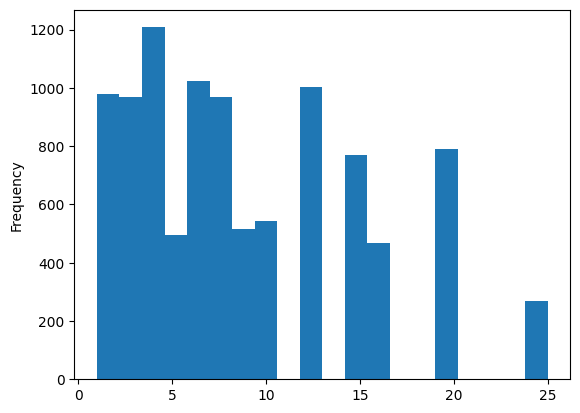

In [76]:
cafe['Total Spent'].plot(kind='hist', bins = 20)

<Axes: ylabel='Density'>

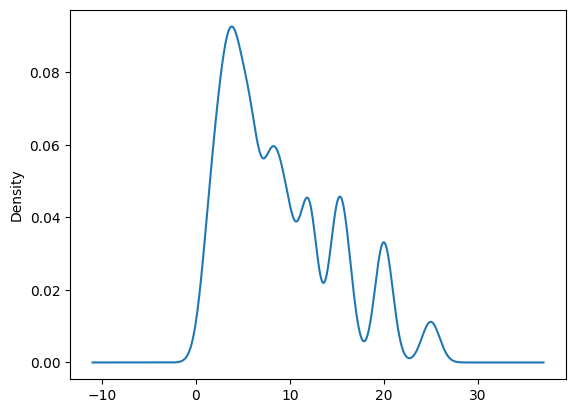

In [77]:
cafe['Total Spent'].plot(kind = 'kde')

<Axes: >

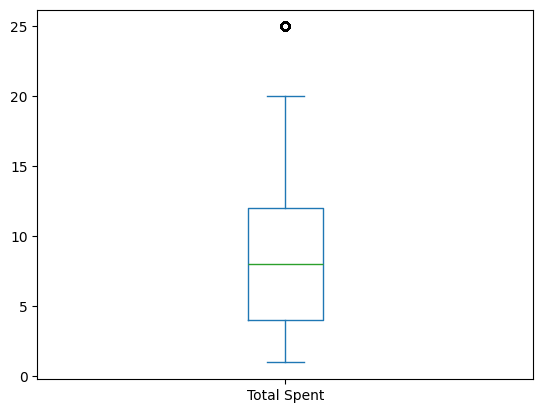

In [78]:
cafe['Total Spent'].plot(kind = 'box')

In [79]:
cafe[cafe['Total Spent'] > 20]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
10,TXN_2548360,Salad,5.0,5.0,25.0,Cash,Takeaway,2023-11-07
51,TXN_6342161,Salad,5.0,5.0,25.0,Digital Wallet,Takeaway,2023-01-08
52,TXN_8914892,Salad,5.0,5.0,25.0,Digital Wallet,Takeaway,2023-03-15
96,TXN_5220895,Salad,5.0,5.0,25.0,Cash,In-store,2023-06-10
100,TXN_9517146,Salad,5.0,5.0,25.0,Cash,Takeaway,2023-10-30
...,...,...,...,...,...,...,...,...
9791,TXN_1232346,Salad,5.0,5.0,25.0,Digital Wallet,In-store,2023-01-04
9805,TXN_9506076,Salad,5.0,5.0,25.0,Digital Wallet,Takeaway,2023-01-17
9879,TXN_6393305,Salad,5.0,5.0,25.0,Digital Wallet,In-store,2023-10-19
9908,TXN_8922585,Salad,5.0,5.0,25.0,Credit Card,Takeaway,2023-06-22


2.2 PAYMENT METHOD¶
1.  Most payment method used by customers is Digital Wallet.
2.  More than 50% payment done through Digit Wallet

In [80]:
cafe['Payment Method'].value_counts()

,count
Payment Method,
Digital Wallet,5469
Credit Card,2273
Cash,2258


<Axes: xlabel='Payment Method'>

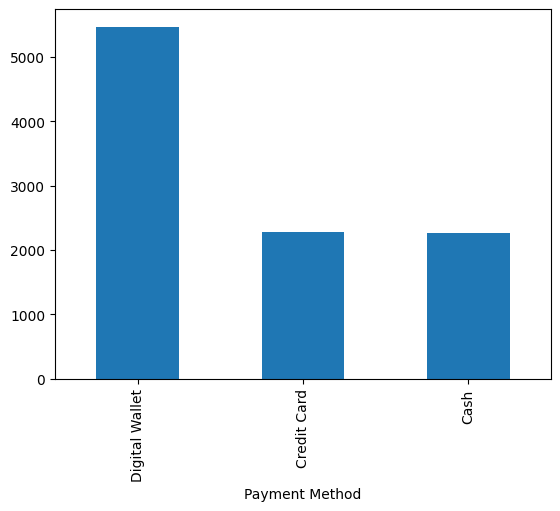

In [81]:
cafe['Payment Method'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

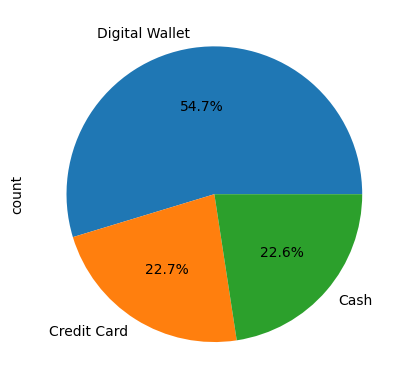

In [82]:
cafe['Payment Method'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')

2.3 LOCATION COL¶
1.  Most customers prefer takeaway service.
2.  70% total customers takeaway orders.

In [83]:
cafe['Location'].value_counts()

,count
Location,
Takeaway,6983
In-store,3017


<Axes: xlabel='Location'>

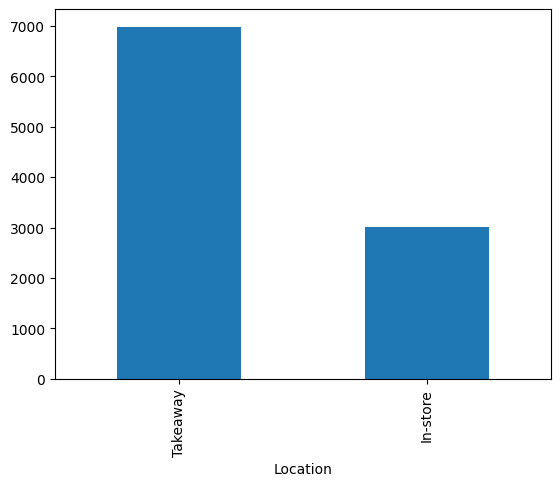

In [84]:
cafe['Location'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

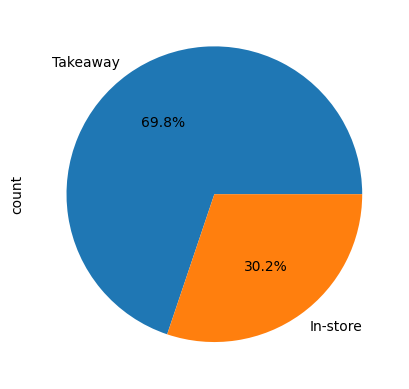

In [85]:
cafe['Location'].value_counts().plot(kind='pie', autopct = '%0.1f%%')

2.4 ITEM COL
1.  The sales distribution among different items is relatively balanced.
2.  Cake (13.9%) and Sandwich (13.6%) being the most popular choices.

In [86]:
cafe['Item'].value_counts()

,count
Item,
Cake,1386
Sandwich,1358
Coffee,1291
Salad,1272
Cookie,1213
Tea,1207
Juice,1177
Smoothie,1096


<Axes: xlabel='Item'>

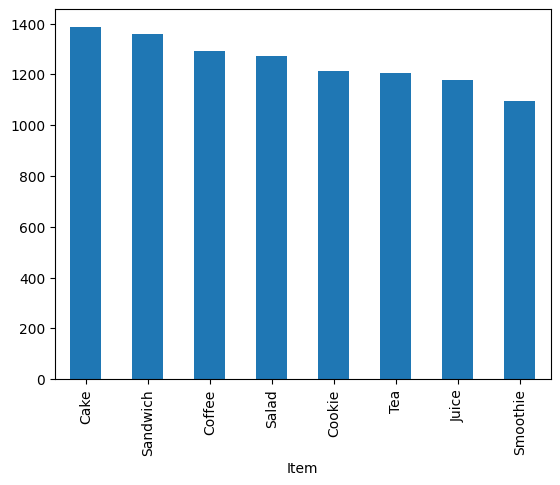

In [87]:
cafe['Item'].value_counts().plot(kind = 'bar')

<Axes: ylabel='count'>

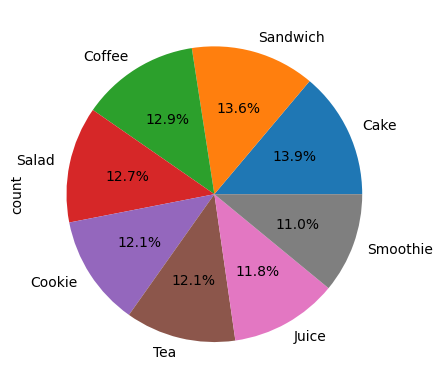

In [88]:
cafe['Item'].value_counts().plot(kind='pie', autopct = '%0.1f%%')

2.5 ITEM vs QUANTITY
1.  Items like Cake, Coffee, Sandwich, and Smoothie are more frequently bought in bulk (5 units) compared to other items
2.  Items such as Juice, Tea, and Salad are commonly purchased in smaller quantities (mostly 1 or 2)
3.  Items like Coffee and Cake show relatively consistent demand
4.  In heatmap the darkest blocks (lowest percentages) are mostly at Quantity = 3, especially for Cookie and Tea.

In [89]:
pd.crosstab(cafe['Quantity'], cafe['Item'])

Item,Cake,Coffee,Cookie,Juice,Salad,Sandwich,Smoothie,Tea
Quantity,,,,,,,,
1.00,261,256,249,221,259,260,207,212
1.25,0,0,0,0,1,0,0,0
2.00,288,249,262,245,260,261,216,275
3.00,266,261,213,250,231,287,222,239
4.00,262,243,253,233,253,248,218,231
5.00,309,282,236,228,268,302,233,250


In [90]:
pd.crosstab(cafe['Quantity'], cafe['Item'], normalize='columns') * 100

Item,Cake,Coffee,Cookie,Juice,Salad,Sandwich,Smoothie,Tea
Quantity,,,,,,,,
1.00,18.831169,19.829589,20.527617,18.776551,20.361635,19.145803,18.886861,17.564209
1.25,0.000000,0.000000,0.000000,0.000000,0.078616,0.000000,0.000000,0.000000
2.00,20.779221,19.287374,21.599340,20.815633,20.440252,19.219440,19.708029,22.783761
3.00,19.191919,20.216886,17.559769,21.240442,18.160377,21.134021,20.255474,19.801160
4.00,18.903319,18.822618,20.857378,19.796092,19.889937,18.262150,19.890511,19.138360
5.00,22.294372,21.843532,19.455894,19.371283,21.069182,22.238586,21.259124,20.712510


<Axes: xlabel='Item', ylabel='Quantity'>

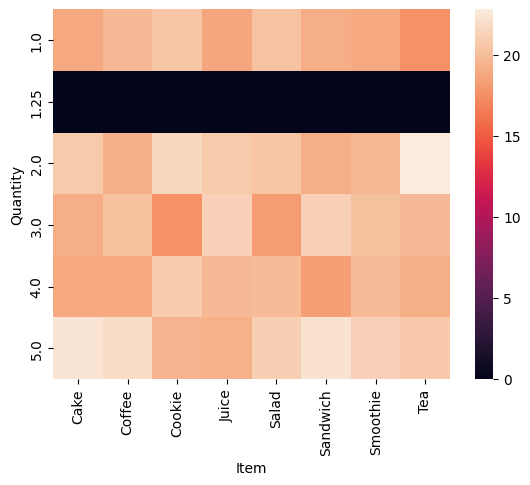

In [91]:
sns.heatmap(pd.crosstab(cafe['Quantity'], cafe['Item'], normalize='columns') * 100)

## 2.6 ITEM vs TOTAL SPENT
1.  The highest total money spent on items Salad, Sandwich, and Smoothie
2.  About 18.6% customers ordered salad
3.  Least purchased item is Cookie

In [92]:
cafe.groupby(['Item'])['Total Spent'].sum().reset_index()

,Item,Total Spent
0,Cake,12684.0
1,Coffee,7838.0
2,Cookie,3604.0
3,Juice,10599.0
4,Salad,19120.0
5,Sandwich,16580.0
6,Smoothie,13368.0
7,Tea,5479.5


In [93]:
total_spent_summary = cafe.groupby(['Item'])['Total Spent'].sum().reset_index()

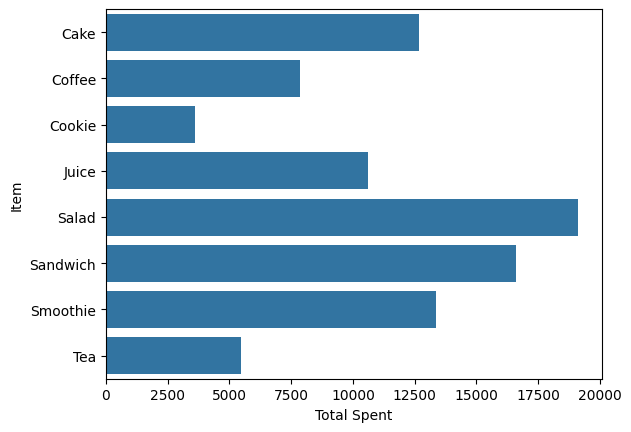

In [94]:
sns.barplot(data = total_spent_summary, x = 'Total Spent', y = 'Item')
plt.show()

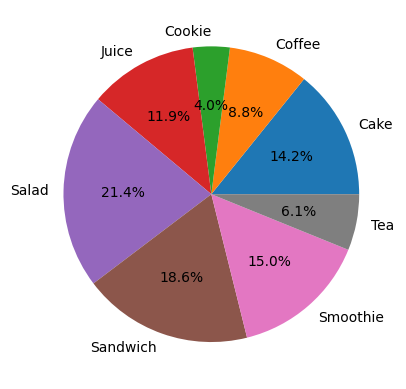

In [95]:
plt.pie(total_spent_summary['Total Spent'], labels = total_spent_summary['Item'], autopct = '%0.1f%%')
plt.show()

## 2.7 PAYMENT METHOD vs TOTAL SPENT
1.  More than 50% customer choose to pay through digital wallet.
2.  20% to 25% customer pay through credit card or cash.

In [96]:
pd.crosstab(cafe['Payment Method'], cafe['Total Spent'])

Total Spent,1.0,1.5,2.0,3.0,4.0,4.5,5.0,6.0,7.5,8.0,9.0,10.0,12.0,15.0,16.0,20.0,25.0
Payment Method,,,,,,,,,,,,,,,,,
Cash,51,49,102,222,214,58,128,239,50,141,127,124,212,171,116,189,65
Credit Card,62,43,121,214,222,51,107,209,64,167,116,127,245,174,114,172,65
Digital Wallet,136,120,295,534,533,130,261,577,136,412,273,291,547,423,236,428,137


In [97]:
cafe.groupby('Payment Method')['Total Spent'].sum().reset_index()


,Payment Method,Total Spent
0,Cash,20441.5
1,Credit Card,20486.0
2,Digital Wallet,48345.0


In [98]:
payment_method_summary = cafe.groupby('Payment Method')['Total Spent'].sum().reset_index()

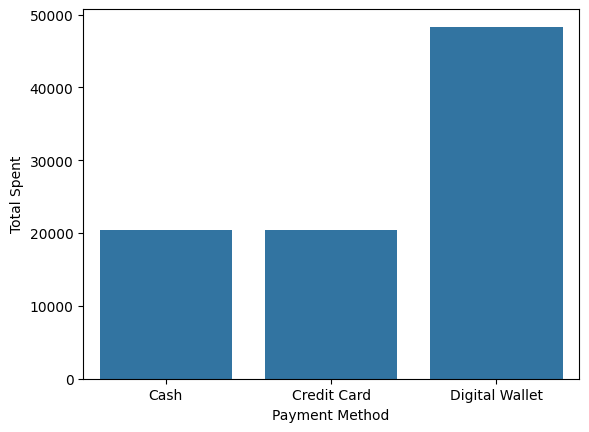

In [99]:
sns.barplot(data = payment_method_summary, x = 'Payment Method', y = 'Total Spent')
plt.show()

<Axes: xlabel='Total Spent', ylabel='Payment Method'>

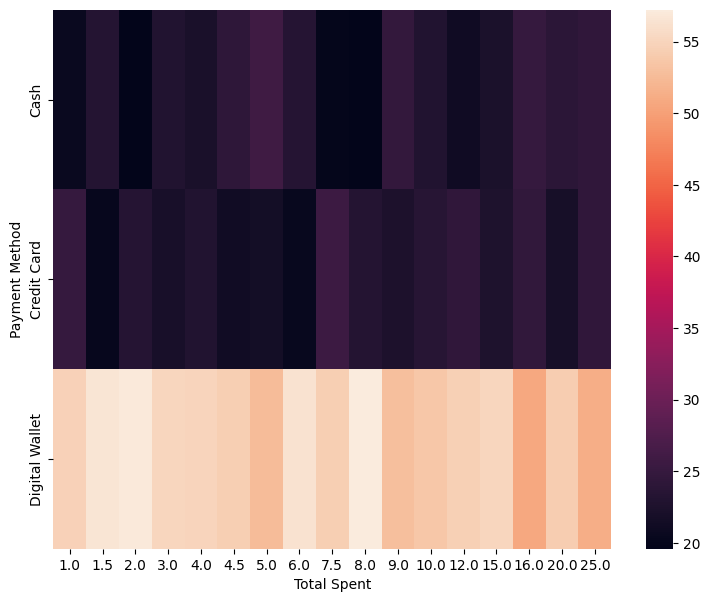

In [100]:
plt.figure(figsize= (9, 7))
sns.heatmap(pd.crosstab(cafe['Payment Method'], cafe['Total Spent'], normalize= 'columns') * 100)

2.8 ITEM vs LOCATION
1.  Most customers prefer takeway service.
2.  Cake, Coffee, and Sandwich are the most popular items for takeaway, along with Cookie, Salad and Tea.

In [101]:
pd.crosstab(cafe['Location'], cafe['Item'])

Item,Cake,Coffee,Cookie,Juice,Salad,Sandwich,Smoothie,Tea
Location,,,,,,,,
In-store,400,352,373,364,406,431,322,369
Takeaway,986,939,840,813,866,927,774,838


In [102]:
pd.crosstab(cafe['Location'], cafe['Item'], normalize= 'columns') * 100

Item,Cake,Coffee,Cookie,Juice,Salad,Sandwich,Smoothie,Tea
Location,,,,,,,,
In-store,28.860029,27.265686,30.750206,30.926083,31.918239,31.73785,29.379562,30.571665
Takeaway,71.139971,72.734314,69.249794,69.073917,68.081761,68.26215,70.620438,69.428335


<Axes: xlabel='Item', ylabel='Location'>

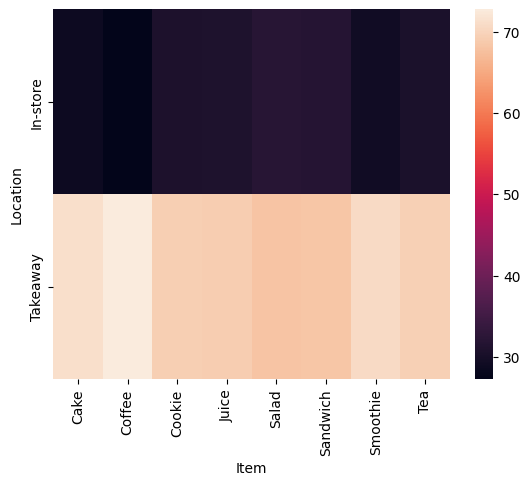

In [103]:
sns.heatmap(pd.crosstab(cafe['Location'], cafe['Item'], normalize = 'columns') * 100)

# 3. FEATURE ENGINEERING ON DATE COLUMN

In [104]:
cafe['Transaction Date'] = pd.to_datetime(cafe['Transaction Date'])

In [105]:
cafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              10000 non-null  category      
 2   Quantity          10000 non-null  float64       
 3   Price Per Unit    10000 non-null  float64       
 4   Total Spent       10000 non-null  float64       
 5   Payment Method    10000 non-null  category      
 6   Location          10000 non-null  category      
 7   Transaction Date  10000 non-null  datetime64[ns]
dtypes: category(3), datetime64[ns](1), float64(3), object(1)
memory usage: 420.7+ KB


In [106]:
cafe['Month'] = cafe['Transaction Date'].dt.month_name()
cafe['Day'] = cafe['Transaction Date'].dt.day_name()

In [107]:
cafe['Month End'] = cafe['Transaction Date'].dt.is_month_end

## 3.1 TOTAL SPENT vs MONTH, DAY COL
1.  Sunday has the highest average spending overall
2.  June and October have high total spent, especially on Fridays and Thursdays
3.  September and July have lower total spending

In [108]:
sales_summary= cafe.groupby(['Month', 'Day'])['Total Spent'].sum().reset_index

In [109]:
df = sales_summary()  # Call the function to get the DataFrame
pivot = df.pivot(index='Day', columns='Month', values='Total Spent')

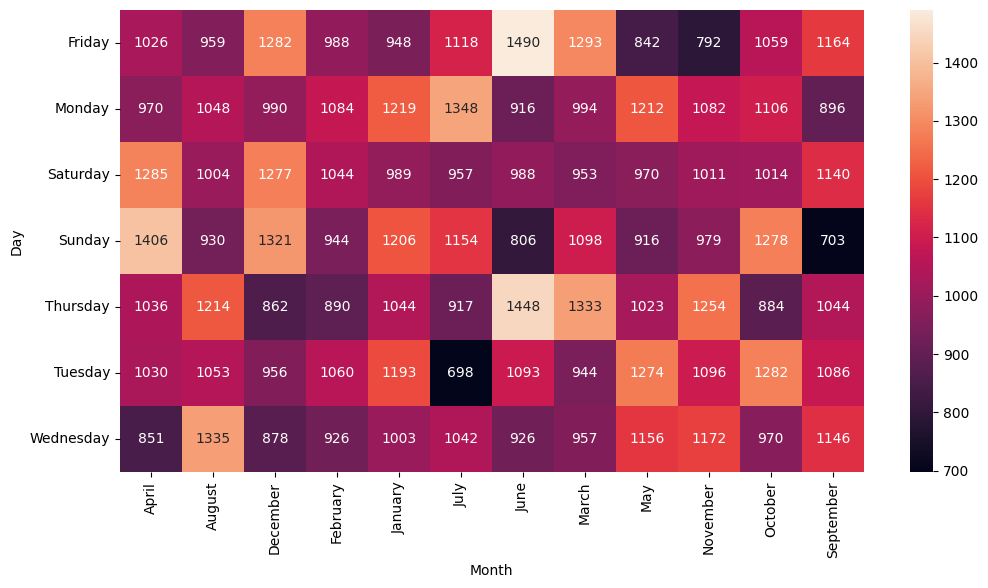

In [110]:
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot = True, fmt=".0f")
plt.show()

In [111]:
cafe.to_excel("cafe_summary.xlsx", index=False)